# Задача
Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

Ниже вы найдете пошаговую инструкцию по выполнению проекта.

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике


## Рекомендации по выполнению проекта
- Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
- Посмотрите на распределение признака для числовых переменных, устраните выбросы.
- Оцените количество уникальных значений для номинативных переменных.
- По необходимости преобразуйте данные
- Проведите корреляционный анализ количественных переменных
- Отберите не коррелирующие переменные.
- Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
- Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import norm
from scipy.stats import t
import math
%matplotlib inline
sns.set() #установка темы графиков

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

df_stud = pd.read_csv('stud_math.csv')
display(df_stud.head(10))
print()
df_stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    ob

In [3]:
# По типам столбцы могут быть числовыми и номинативными
print('Числовые переменные ')
for col in df_stud.columns:
    if (('int' in str(type(df_stud[col][0])))|('float' in str(type(df_stud[col][0])))):
        print(col, end = ', ')
print()
print()
print('Строковые переменные ')
for col in df_stud.columns:
    if (('int' not in str(type(df_stud[col][0])))&('float' not in str(type(df_stud[col][0])))):
        print(col, end = ', ')
        
print()
print()
print('Категориальные признаки')
print(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health'])
      
print()
print('Числовые признаки')
print(['age',  'absences', 'score'])


Числовые переменные 
age, famsize, Medu, Fedu, traveltime, studytime, failures, studytime, granular, internet, famrel, freetime, goout, health, absences, score, 

Строковые переменные 
school, sex, address, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, romantic, 

Категориальные признаки
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'studytime, granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']

Числовые признаки
['age', 'absences', 'score']


In [4]:
# посчитаем относительную величину пропусков
for col in df_stud.columns:
    pct_missing = df_stud[col].isna().mean()
    print(f'{col} - {pct_missing :.1%}')

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.3%
famsize - 6.8%
Pstatus - 11.4%
Medu - 0.8%
Fedu - 6.1%
Mjob - 4.8%
Fjob - 9.1%
reason - 4.3%
guardian - 7.8%
traveltime - 7.1%
studytime - 1.8%
failures - 5.6%
schoolsup - 2.3%
famsup - 9.9%
paid - 10.1%
activities - 3.5%
nursery - 4.1%
studytime, granular - 1.8%
higher - 5.1%
internet - 8.6%
romantic - 7.8%
famrel - 6.8%
freetime - 2.8%
goout - 2.0%
health - 3.8%
absences - 3.0%
score - 1.5%


0.0      37
20.0      1
25.0      7
30.0     15
35.0      9
40.0     31
45.0     27
50.0     54
55.0     46
60.0     31
65.0     31
70.0     27
75.0     33
80.0     16
85.0      6
90.0     12
95.0      5
100.0     1
NaN       6
Name: score, dtype: int64

395

<BarContainer object of 19 artists>

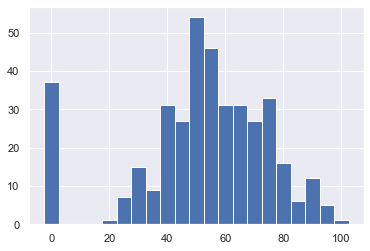

In [5]:
# пропусков не так много, нужно их заполнить или удалить. Есть пропуски в целевой переменной Score

# Распределение score сходно с нормальным распределением, 
# однако имеет много значений, равных 0, которые выбиваются из общего распределения.
# логически возможно получить 0 баллов по экзамену: не решить ничего, или не явиться на экзамен. 
# Но скорее всего есть и те значения, которые не заполнены случайно.

score_freq = df_stud['score'].value_counts(dropna = False).sort_index()
display(score_freq)
display(score_freq.values.sum())
plt.bar(score_freq.index, score_freq.values,5)

In [6]:
# Проверим гипотезу о том, что нулевые значения случайны.
# Если они случайны, то статистические показатели не должны слишком измениться при удалении строк.
display(df_stud['score'].describe())
print(df_stud['score'].mean())
print(df_stud['score'].median())
print(df_stud['score'].mode()[0])
print(df_stud['score'].std())
print('-----------')
df_stud2 = df_stud.copy()
df_stud2 = df_stud2[df_stud2.score != 0]
display(df_stud2['score'].describe())
print(df_stud2['score'].mean())
print(df_stud2['score'].median())
print(df_stud2['score'].mode()[0])
print(df_stud2['score'].std())

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

52.26221079691517
55.0
50.0
22.919022312471654
-----------


count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

57.75568181818182
55.0
50.0
16.20092753810883


In [7]:
# Медиана и мода не изменились, среднее кавадратичное уменьшилось.
# Можно предположить, что нулевые значения случайны и их исключение не повлияе на дальнейшее исследование.

# Но! Строки со значением 0 составляют довольно большой процент всех строк датасета. Пока оставим их в другой таблице
pct_missing = df_stud[df_stud['score'] == 0]['score'].count()/df_stud['score'].count()
print(f'Процент значений score == 0:  {pct_missing :.1%}')

df_stud_score0 = df_stud[(df_stud['score'] == 0) | (df_stud['score'].isna())]

Процент значений score == 0:  9.5%


In [8]:
print('Таблица, со значениями score Nan or 0')
display(df_stud_score0.sample(5))

Таблица, со значениями score Nan or 0


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN


In [9]:
# Так как score - это целевая переменная, удалим строки, где score неизвестно или равно 0
print(df_stud['score'].count())
df_stud = df_stud.dropna(subset=['score'])
df_stud = df_stud[df_stud['score']!=0]
print(df_stud['score'].count())

389
352


In [10]:
display(df_stud)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


352

count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

57.75568181818182
55.0
50.0
16.20092753810883
<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               352 non-null    object 
 1   sex                  352 non-null    object 
 2   age                  352 non-null    int64  
 3   address              338 non-null    object 
 4   famsize              328 non-null    object 
 5   Pstatus              311 non-null    object 
 6   Medu                 350 non-null    float64
 7   Fedu                 331 non-null    float64
 8   Mjob                 335 non-null    object 
 9   Fjob                 320 non-null    object 
 10  reason               337 non-null    object 
 11  guardian             323 non-null    object 
 12  traveltime           329 non-null    float64
 13  studytime            345 non-null    float64
 14  failures             332 non-null    float64

None

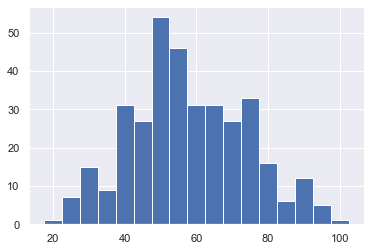

In [11]:
score_freq = df_stud['score'].value_counts(dropna = False).sort_index()
display(score_freq.values.sum())
plt.bar(score_freq.index, score_freq.values,5)
display(df_stud['score'].describe())
print(df_stud['score'].mean())
print(df_stud['score'].median())
print(df_stud['score'].mode()[0])
print(df_stud['score'].std())
display(df_stud.info())

In [12]:
# посчитаем относительную и абослютную величину пропусков
for col in df_stud.columns:
    pct_missing = df_stud[col].isna().mean()
    print(f'{col} - {pct_missing :.1%} - {df_stud[col].isna().sum()}')

school - 0.0% - 0
sex - 0.0% - 0
age - 0.0% - 0
address - 4.0% - 14
famsize - 6.8% - 24
Pstatus - 11.6% - 41
Medu - 0.6% - 2
Fedu - 6.0% - 21
Mjob - 4.8% - 17
Fjob - 9.1% - 32
reason - 4.3% - 15
guardian - 8.2% - 29
traveltime - 6.5% - 23
studytime - 2.0% - 7
failures - 5.7% - 20
schoolsup - 2.6% - 9
famsup - 10.2% - 36
paid - 10.2% - 36
activities - 3.4% - 12
nursery - 3.4% - 12
studytime, granular - 2.0% - 7
higher - 5.4% - 19
internet - 8.2% - 29
romantic - 8.2% - 29
famrel - 6.8% - 24
freetime - 2.3% - 8
goout - 1.7% - 6
health - 3.7% - 13
absences - 2.8% - 10
score - 0.0% - 0


In [13]:
# Заполним пропуски у остальных столбцов. Начнем с категориальных признаков (все столбцы, кроме absences)

In [14]:
columns = ['address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health']
for col in columns:
    print(col)
    display(df_stud[col].sort_values().value_counts(sort=False, dropna=False))

address


NaN     14
U      265
R       73
Name: address, dtype: int64

famsize


NaN     24
GT3    228
LE3    100
Name: famsize, dtype: int64

Pstatus


NaN     41
T      277
A       34
Name: Pstatus, dtype: int64

Medu


0.0      3
1.0     47
2.0     88
3.0     87
4.0    125
NaN      2
Name: Medu, dtype: int64

Fedu


0.0      2
1.0     65
2.0     94
3.0     89
4.0     80
40.0     1
NaN     21
Name: Fedu, dtype: int64

Mjob


NaN          17
services     90
at_home      49
teacher      51
health       30
other       115
Name: Mjob, dtype: int64

Fjob


NaN          32
services     89
at_home      14
teacher      26
health       15
other       176
Name: Fjob, dtype: int64

reason


NaN            15
home           89
course        119
reputation     96
other          33
Name: reason, dtype: int64

guardian


NaN        29
father     78
mother    225
other      20
Name: guardian, dtype: int64

traveltime


1.0    219
2.0     86
3.0     17
4.0      7
NaN     23
Name: traveltime, dtype: int64

studytime


1.0     90
2.0    173
3.0     58
4.0     24
NaN      7
Name: studytime, dtype: int64

failures


0.0    273
1.0     38
2.0     11
3.0     10
NaN     20
Name: failures, dtype: int64

schoolsup


NaN      9
no     295
yes     48
Name: schoolsup, dtype: int64

famsup


NaN     36
no     120
yes    196
Name: famsup, dtype: int64

paid


NaN     36
no     170
yes    146
Name: paid, dtype: int64

activities


NaN     12
no     168
yes    172
Name: activities, dtype: int64

nursery


NaN     12
no      68
yes    272
Name: nursery, dtype: int64

studytime, granular


-12.0     24
-9.0      58
-6.0     173
-3.0      90
 NaN       7
Name: studytime, granular, dtype: int64

higher


NaN     19
no      13
yes    320
Name: higher, dtype: int64

internet


NaN     29
no      49
yes    274
Name: internet, dtype: int64

romantic


NaN     29
no     219
yes    104
Name: romantic, dtype: int64

famrel


-1.0      1
 1.0      6
 2.0     14
 3.0     56
 4.0    163
 5.0     88
 NaN     24
Name: famrel, dtype: int64

freetime


1.0     16
2.0     59
3.0    132
4.0    102
5.0     35
NaN      8
Name: freetime, dtype: int64

goout


1.0     19
2.0     92
3.0    118
4.0     74
5.0     43
NaN      6
Name: goout, dtype: int64

health


1.0     45
2.0     36
3.0     81
4.0     53
5.0    124
NaN     13
Name: health, dtype: int64

In [15]:
# address
col= 'address'
display(df_stud[col].describe())

count     338
unique      2
top         U
freq      265
Name: address, dtype: object

In [16]:
# предположим, что есть свяь между местом жительства и школой
df_stud[['address','school']].groupby(by='address').count()
df = df_stud[['address','school','sex']]
pd.pivot_table(df, index='address', columns='school', values='sex', aggfunc='count')

school,GP,MS
address,,
R,53,20
U,248,17


In [17]:
# связь не существенная
# возможно есть связь с затратами времени до школы
df_stud[['address','traveltime']].groupby(by='address').count()
df = df_stud[['address','traveltime','sex']]
pd.pivot_table(df, index='address', columns='traveltime', values='sex', aggfunc='count')

traveltime,1.0,2.0,3.0,4.0
address,,,,
R,32,22,10,4
U,181,59,7,3


In [18]:
# связь не существенная.
# Поэтому, предполагаем, что у этого параметра нет особой связт с другими параметрами.
# заполним пустые значения теми, которые встречаются чаще, то есть 'U'


In [19]:
fill_mode(df_stud, 'address')
display(df_stud[col].sort_values().value_counts(sort=False, dropna=False))

U    279
R     73
Name: address, dtype: int64

In [20]:
# famsize
col= 'famsize'
display(df_stud[col].describe())

count     328
unique      2
top       GT3
freq      228
Name: famsize, dtype: object

In [21]:
# проверим связь с образованием и работой матери
related_cols = ['Medu', 'Mjob']
for rel in related_cols:
    df_stud[[col,rel]].groupby(by=col).count()
    df = df_stud[[col,rel,'sex']]
    display(pd.pivot_table(df, index=col, columns=rel, values='sex', aggfunc='count'))

Medu,0.0,1.0,2.0,3.0,4.0
famsize,,,,,
GT3,2,27,57,58,83
LE3,1,18,22,25,33


Mjob,at_home,health,other,services,teacher
famsize,,,,,
GT3,31,18,81,58,28
LE3,12,10,28,28,18


In [22]:
# связь не существенная.
# заполним пустые значения теми, которые встречаются чаще
fill_mode(df_stud, 'famsize')
display(df_stud[col].sort_values().value_counts(sort=False, dropna=False))

GT3    252
LE3    100
Name: famsize, dtype: int64

In [23]:
# famsize
col= 'Pstatus'
display(df_stud[col].describe())

count     311
unique      2
top         T
freq      277
Name: Pstatus, dtype: object

In [24]:
# проверим связь с образованием и работой матери
related_cols = ['guardian']
for rel in related_cols:
    df_stud[[col,rel]].groupby(by=col).count()
    df = df_stud[[col,rel,'sex']]
    display(pd.pivot_table(df, index=col, columns=rel, values='sex', aggfunc='count'))

guardian,father,mother,other
Pstatus,,,
A,3,27,3
T,65,172,14


In [25]:
# связь не существенная.
# заполним пустые значения теми, которые встречаются чаще
fill_mode(df_stud, col)
display(df_stud[col].sort_values().value_counts(sort=False, dropna=False))

T    318
A     34
Name: Pstatus, dtype: int64

In [26]:
# Medu, Fedu
cols=['Medu', 'Fedu']
for col in cols:
    display(df_stud[col].sort_values().value_counts(sort=False, dropna=False))

0.0      3
1.0     47
2.0     88
3.0     87
4.0    125
NaN      2
Name: Medu, dtype: int64

0.0      2
1.0     65
2.0     94
3.0     89
4.0     80
40.0     1
NaN     21
Name: Fedu, dtype: int64

In [27]:
# В одном из значений Fedu есть исключительное значение 40, это ошибка, заменим его на 4
df_stud.Fedu = df_stud.Fedu.apply(lambda x: 4 if x == 40 else x)
display(df_stud.Fedu.value_counts(dropna=False))
df = df_stud[['Medu', 'Fedu','Mjob','Fjob']]

2.0    94
3.0    89
4.0    81
1.0    65
NaN    21
0.0     2
Name: Fedu, dtype: int64

In [28]:
# чтобы найти корреляцию для Mjob & Fjob заменим str to int
jobs_dict = {'other': 0,'at_home': 1,'services':2,'health':3,'teacher':4}
df['Mjob'] = df['Mjob'].map(jobs_dict)
df['Fjob'] = df['Fjob'].map(jobs_dict)
df.corr()

<ipython-input-28-e0a63d846d8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mjob'] = df['Mjob'].map(jobs_dict)
<ipython-input-28-e0a63d846d8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fjob'] = df['Fjob'].map(jobs_dict)


,Medu,Fedu,Mjob,Fjob
Medu,1.000000,0.606270,0.508285,0.217894
Fedu,0.606270,1.000000,0.315461,0.352926
Mjob,0.508285,0.315461,1.000000,0.274261
Fjob,0.217894,0.352926,0.274261,1.000000


In [29]:
df.describe()

,Medu,Fedu,Mjob,Fjob
count,350.000000,331.000000,335.000000,320.000000
mean,2.811429,2.549849,1.561194,1.065625
std,1.091192,1.081424,1.425280,1.322131
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000
50%,3.000000,3.000000,2.000000,0.000000
75%,4.000000,3.000000,2.000000,2.000000
max,4.000000,4.000000,4.000000,4.000000


In [30]:
# между Medu и Fedu корреляция 60%, можно принять ее за существенную и на ее основании запонить пропуски
inds = df_stud[['Medu', 'Fedu']][(df_stud['Medu'].isna())|(df_stud['Fedu'].isna())].index.values
df_stud.Fedu.fillna(df_stud.Medu, inplace = True)
df_stud.Medu.fillna(df_stud.Fedu, inplace = True)
display(df_stud.loc[list(inds)])


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,4.0,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
42,GP,M,15,U,GT3,T,4.0,4.0,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
46,GP,F,16,U,LE3,A,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
57,GP,M,15,U,GT3,T,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
58,GP,M,15,U,LE3,T,1.0,1.0,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
67,GP,F,16,U,GT3,T,3.0,3.0,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
92,GP,F,16,U,LE3,T,1.0,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
142,GP,F,15,U,GT3,T,4.0,4.0,teacher,services,course,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,-9.0,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
159,GP,M,16,U,GT3,T,3.0,3.0,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
161,GP,M,15,R,GT3,T,3.0,3.0,other,NaN,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,-6.0,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0


In [31]:
display(pd.pivot_table(df, index='Medu', columns='Mjob', values='Fjob', aggfunc='count'))
display(pd.pivot_table(df, index='Fedu', columns='Fjob', values='Mjob', aggfunc='count'))

Mjob,0.0,1.0,2.0,3.0,4.0
Medu,,,,,
0.0,1.0,2.0,NaN,NaN,NaN
1.0,16.0,19.0,4.0,1.0,NaN
2.0,36.0,16.0,26.0,1.0,NaN
3.0,31.0,6.0,29.0,3.0,3.0
4.0,19.0,1.0,22.0,19.0,47.0


Fjob,0.0,1.0,2.0,3.0,4.0
Fedu,,,,,
0.0,2.0,NaN,NaN,NaN,NaN
1.0,40.0,3.0,15.0,1.0,NaN
2.0,48.0,3.0,23.0,1.0,NaN
3.0,44.0,3.0,26.0,3.0,1.0
4.0,26.0,2.0,15.0,8.0,21.0


In [32]:
''' видим для M соответствие образования и работы, особенно если образование Высшее - 4 - 4 - teacher.
    Однако, если упростить, то лучше заполнить все пропуски mode - other.
'''
df_stud['Fjob'].fillna('other', inplace = True)
df_stud['Mjob'].fillna('other', inplace = True)


In [33]:
'''
    'reason', 'guardian', 'traveltime', 'studytime',
    'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
    'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
    'freetime', 'goout', 'health'
'''
# остальные категориальные признаки заполним значением mode, но перед этим проверим столбцы famrel, ''studytime, granular'' 

display(df_stud['famrel'].sort_values().value_counts(sort=False, dropna=False))
display(df_stud['studytime, granular'].sort_values().value_counts(sort=False, dropna=False))

-1.0      1
 1.0      6
 2.0     14
 3.0     56
 4.0    163
 5.0     88
 NaN     24
Name: famrel, dtype: int64

-12.0     24
-9.0      58
-6.0     173
-3.0      90
 NaN       7
Name: studytime, granular, dtype: int64

In [34]:
# в столбце famrel не верное значение -1, заменим его на 1

row = int(df_stud['famrel'][df_stud['famrel']==-1].index.values)
df_stud.at[row,'famrel'] = 1
df_stud.at[row,'famrel']

1.0

In [35]:
# столбец 'studytime, granular' кажется не правильным, нужно проверить его на корреляцию с другими столбцами, 
# он либо дублирует данные, лтбо не несет информации.Пока есть предположение, что его данные это n*(-3)

df_stud.corr()['studytime, granular']

age                    0.011426
Medu                  -0.069738
Fedu                   0.014055
traveltime             0.101490
studytime             -1.000000
failures               0.156406
studytime, granular    1.000000
famrel                -0.057143
freetime               0.128661
goout                  0.029686
health                 0.085469
absences               0.030187
score                 -0.142055
Name: studytime, granular, dtype: float64

In [36]:
# обнаружена полная корреляция между столбцами 'studytime, granular' и 'studytime'
# значит один из них можно удалить. Лишним является 'studytime, granular'

df_stud.drop(['studytime, granular'], axis=1, inplace=True)

In [37]:
display(df_stud['famrel'].sort_values().value_counts(sort=False, dropna=False))

1.0      7
2.0     14
3.0     56
4.0    163
5.0     88
NaN     24
Name: famrel, dtype: int64

In [38]:
cols=['reason', 'guardian', 'traveltime', 'studytime',
    'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
    'freetime', 'goout', 'health']
df_stud[cols].corr()

,traveltime,studytime,failures,famrel,freetime,goout,health
traveltime,1.000000,-0.101490,0.091757,-0.029299,-0.023067,0.029374,-0.000092
studytime,-0.101490,1.000000,-0.156406,0.057143,-0.128661,-0.029686,-0.085469
failures,0.091757,-0.156406,1.000000,0.006870,0.127391,0.126770,0.064083
famrel,-0.029299,0.057143,0.006870,1.000000,0.158597,0.045341,0.107055
freetime,-0.023067,-0.128661,0.127391,0.158597,1.000000,0.296392,0.072729
goout,0.029374,-0.029686,0.126770,0.045341,0.296392,1.000000,-0.010343
health,-0.000092,-0.085469,0.064083,0.107055,0.072729,-0.010343,1.000000


In [39]:
for col in cols:
    pct_missing = df_stud[col].isna().mean()
    print(f'{col} - {pct_missing :.1%} - {df_stud[col].isna().sum()}')

reason - 4.3% - 15
guardian - 8.2% - 29
traveltime - 6.5% - 23
studytime - 2.0% - 7
failures - 5.7% - 20
schoolsup - 2.6% - 9
famsup - 10.2% - 36
paid - 10.2% - 36
activities - 3.4% - 12
nursery - 3.4% - 12
higher - 5.4% - 19
internet - 8.2% - 29
romantic - 8.2% - 29
famrel - 6.8% - 24
freetime - 2.3% - 8
goout - 1.7% - 6
health - 3.7% - 13


In [40]:
# Высокой корреляции с рассматриваемыми столбцами не обнаружено. Заполняем.

for col in cols:
    df_stud[col].fillna(df_stud[col].mode()[0], inplace=True)


In [41]:
for col in cols:
    pct_missing = df_stud[col].isna().mean()
    print(f'{col} - {pct_missing :.1%} - {df_stud[col].isna().sum()}')

reason - 0.0% - 0
guardian - 0.0% - 0
traveltime - 0.0% - 0
studytime - 0.0% - 0
failures - 0.0% - 0
schoolsup - 0.0% - 0
famsup - 0.0% - 0
paid - 0.0% - 0
activities - 0.0% - 0
nursery - 0.0% - 0
higher - 0.0% - 0
internet - 0.0% - 0
romantic - 0.0% - 0
famrel - 0.0% - 0
freetime - 0.0% - 0
goout - 0.0% - 0
health - 0.0% - 0


In [42]:
for col in df_stud.columns:
    pct_missing = df_stud[col].isna().mean()
    print(f'{col} - {pct_missing :.1%} - {df_stud[col].isna().sum()}')

school - 0.0% - 0
sex - 0.0% - 0
age - 0.0% - 0
address - 0.0% - 0
famsize - 0.0% - 0
Pstatus - 0.0% - 0
Medu - 0.0% - 0
Fedu - 0.0% - 0
Mjob - 0.0% - 0
Fjob - 0.0% - 0
reason - 0.0% - 0
guardian - 0.0% - 0
traveltime - 0.0% - 0
studytime - 0.0% - 0
failures - 0.0% - 0
schoolsup - 0.0% - 0
famsup - 0.0% - 0
paid - 0.0% - 0
activities - 0.0% - 0
nursery - 0.0% - 0
higher - 0.0% - 0
internet - 0.0% - 0
romantic - 0.0% - 0
famrel - 0.0% - 0
freetime - 0.0% - 0
goout - 0.0% - 0
health - 0.0% - 0
absences - 2.8% - 10
score - 0.0% - 0


15    76
16    95
17    90
18    69
19    16
20     2
21     1
22     1
Name: age, dtype: int64

count    350.000000
mean      16.625714
std        1.246162
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

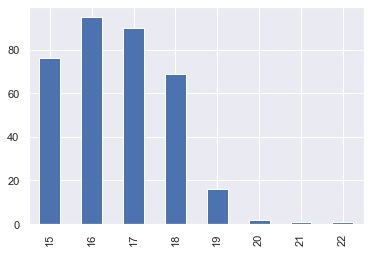

In [108]:
# age
display(df_stud['age'].sort_values().value_counts(sort=False, dropna=False))
df_stud['age'].sort_values().value_counts(sort=False, dropna=False).plot(kind='bar')
df_stud['age'].describe()

0.0      74
1.0       3
2.0      60
3.0       7
4.0      52
5.0       5
6.0      30
7.0       6
8.0      20
9.0       3
10.0     17
11.0      2
12.0     12
13.0      2
14.0     12
15.0      2
16.0      7
17.0      1
18.0      5
19.0      1
20.0      4
21.0      1
22.0      3
23.0      1
24.0      1
25.0      1
26.0      1
28.0      1
30.0      1
38.0      1
40.0      1
54.0      1
56.0      1
75.0      1
212.0     1
NaN      10
385.0     1
Name: absences, dtype: int64

count    342.000000
mean       8.090643
std       24.704600
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

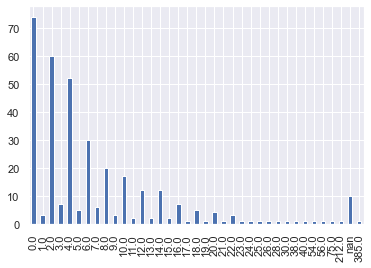

In [43]:
# absences
display(df_stud['absences'].sort_values().value_counts(sort=False, dropna=False))
df_stud['absences'].sort_values().value_counts(sort=False, dropna=False).plot(kind='bar')
df_stud['absences'].describe()

In [44]:
# absences - количество пропусков. В году 32 учебных недели по 6 дней = 192 дня.
# Поэтому будем считать 212 и 385 пропусков - выбросами 
# get_boxplot(df_stud,'absences')
# df_stud.boxplot(column='absences')

df_stud.drop(index=(df_stud[df_stud.absences>192].index.values), inplace=True)

In [45]:
# NaN заменим модой
df_stud.absences.fillna(0, inplace=True)

0.0     84
2.0     63
4.0     59
6.0     35
8.0     26
10.0    20
12.0    14
14.0    14
16.0     9
18.0     6
20.0     5
22.0     4
24.0     2
26.0     2
28.0     1
30.0     1
38.0     1
40.0     1
54.0     1
56.0     1
76.0     1
Name: absences, dtype: int64

count    350.000000
mean       6.302857
std        8.330545
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       76.000000
Name: absences, dtype: float64

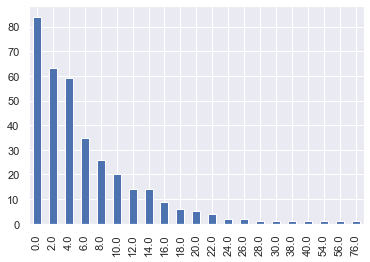

In [46]:
# заметим, что нечетного количества пропусков довольно мало, возможно это связано с тем, что часы считаются парами.
# чтобы в дальнейшем применить анализ, упростим модель и заменим все нечетные пропуски четными добавление +1

df_stud.absences = df_stud.absences.apply(lambda x: (x+1) if x % 2 == 1 else x)
display(df_stud['absences'].sort_values().value_counts(sort=False, dropna=False))
df_stud['absences'].sort_values().value_counts(sort=False, dropna=False).plot(kind='bar')
df_stud['absences'].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.117094,-0.129519,0.104442,-0.011048,0.220280,0.058948,-0.012594,0.116367,-0.058608,0.216303,-0.125073
Medu,-0.117094,1.000000,0.632551,-0.156250,0.069081,-0.200185,-0.003103,0.023504,0.077321,-0.054103,0.078610,0.195917
Fedu,-0.129519,0.632551,1.000000,-0.134472,-0.013792,-0.250756,-0.008065,-0.011347,0.060655,0.003450,0.031594,0.125227
traveltime,0.104442,-0.156250,-0.134472,1.000000,-0.098504,0.088629,-0.032285,-0.016317,0.037284,-0.016617,0.005735,-0.071340
studytime,-0.011048,0.069081,-0.013792,-0.098504,1.000000,-0.148758,0.054888,-0.126713,-0.029956,-0.072956,-0.073680,0.140438
failures,0.220280,-0.200185,-0.250756,0.088629,-0.148758,1.000000,-0.015368,0.112350,0.115864,0.058493,0.133721,-0.283415
famrel,0.058948,-0.003103,-0.008065,-0.032285,0.054888,-0.015368,1.000000,0.146775,0.029129,0.110954,-0.053343,0.053346
freetime,-0.012594,0.023504,-0.011347,-0.016317,-0.126713,0.112350,0.146775,1.000000,0.291934,0.066957,-0.083915,-0.009728
goout,0.116367,0.077321,0.060655,0.037284,-0.029956,0.115864,0.029129,0.291934,1.000000,-0.006957,0.037175,-0.170698
health,-0.058608,-0.054103,0.003450,-0.016617,-0.072956,0.058493,0.110954,0.066957,-0.006957,1.000000,-0.019544,-0.084725


<AxesSubplot:>

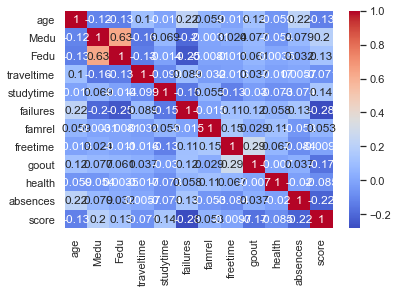

In [80]:
# теперь в датафрейме нет пропусков и можно приступить к анализу данных
corr_studs = df_stud.corr()
display(corr_studs)
sns.heatmap(corr_studs,annot=True, cmap='coolwarm')

## Выводы по корреляции числовых переменных (включая оминативные, представленные в виде чисел)

Более 50% скоррелированы между собой параметры Medu и Fedu, однако корреляция всего 63%, посчитаем ее пока не значительной.
Остальные параметры скоррелированы между собой еще меньше, значит исключать их не будем.

Заметим, что Medu, Fedu, famrel, studytime, скоррелированы положительно. Это может показывать, что
<ul>
    <li>образование родителей положительно влияет на успеваемость.
    <li>время, уделяемое учебе, положительно влияет на успеваемость.
    <li>взаимоотношения в семье положительно влияет на успеваемость, но меньше чем два других параметра.
</ul>      
  
Остальные параметры скоррелированы отрицательно, значит имеют отрицательное влияние на оценку по экзамену.
<ul>
    <li>Возраст влияет отрицательно. Хотя стоит отметить, что учеников от 20 лет и старше слишком мало, чтобы делать оценку.
    <li>Сильнее других отрицательно влияют на оценку - жизненные неудачи (failures) и пропуски (absences)
    <li>взаимоотношения в семье положительно влияет на успеваемость, но меньше чем два других параметра.
    <li>Далее по влиянию - время, проведенное с друзьями (goout) и время до учебы (traveltime). Это может быть из-за того, что у ученика остается меньше времени на учебу, хотя явной корреляции со studytime не выявлено.
    <li> Здоровье и свободное время мало влияют на оценку.
</ul>      

Возможно, что все параметры по оценке времени стоит рассмотреть вместе: freetime, goout, traveltime, studytime 


In [83]:
# Так как в корреляционный анализ не вошли переменные с типом Str, поведем анализ номинативных переменных

cols = df_stud.columns[:-1]
cols


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences'],
      dtype='object')

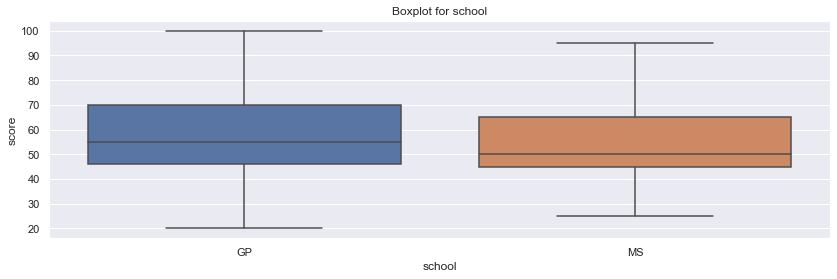

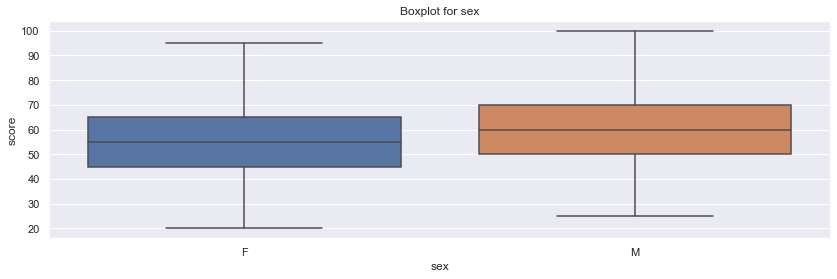

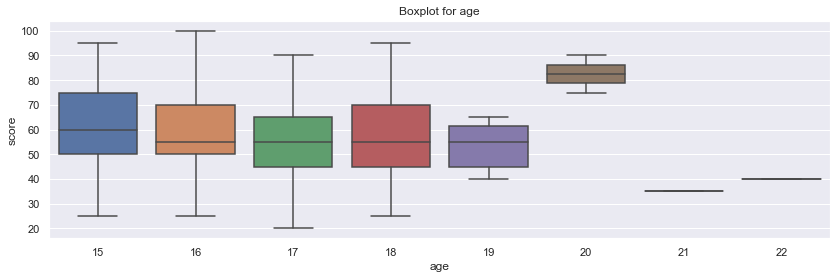

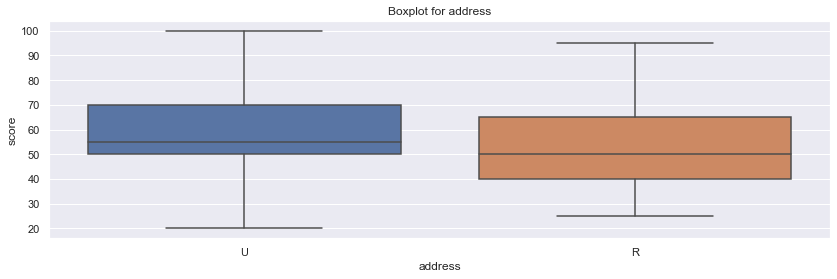

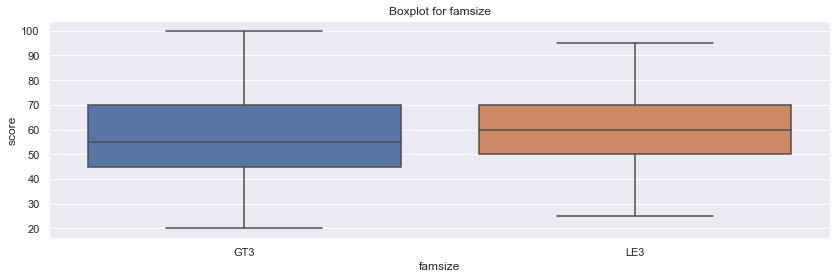

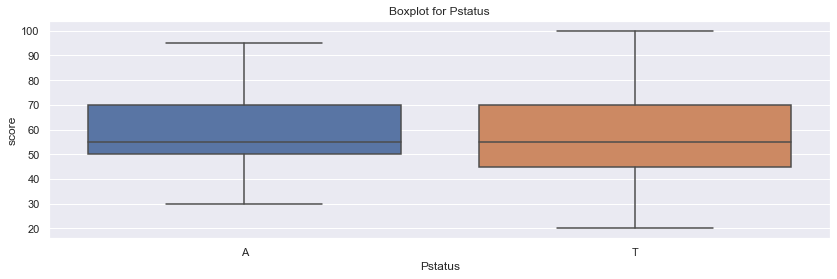

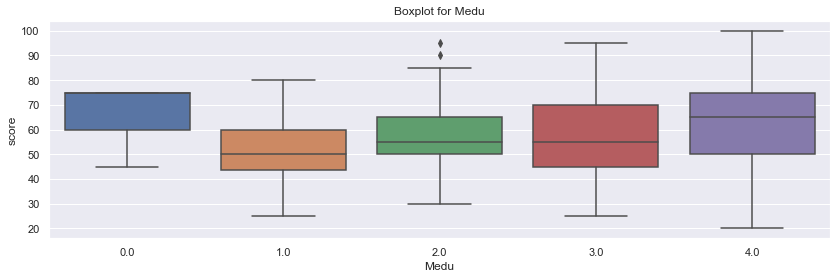

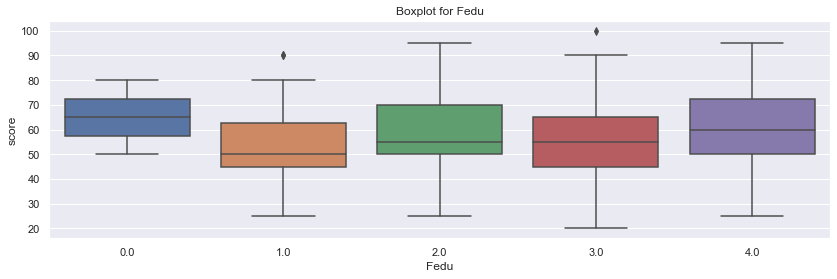

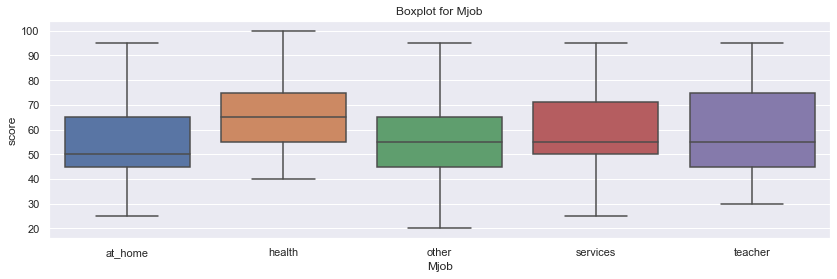

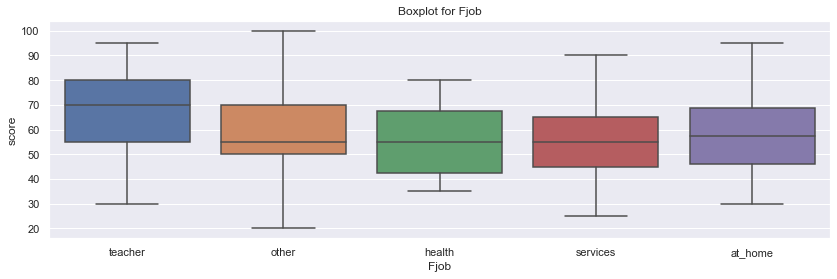

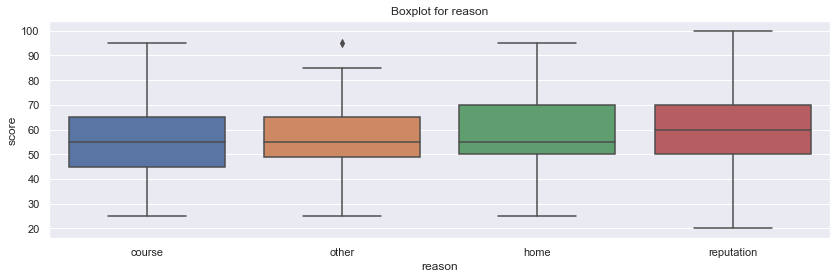

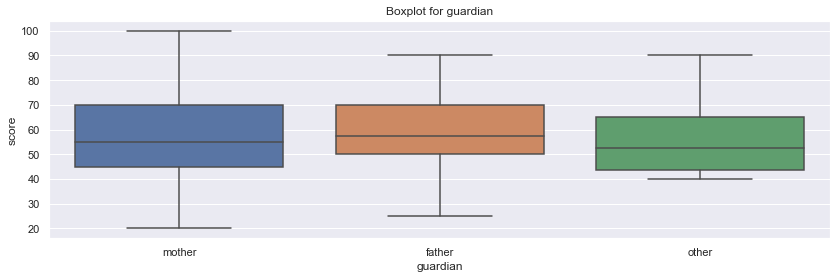

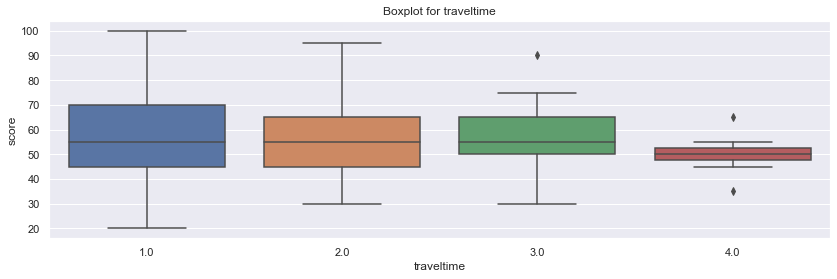

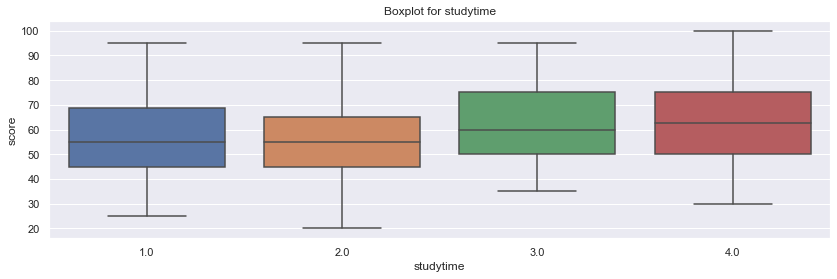

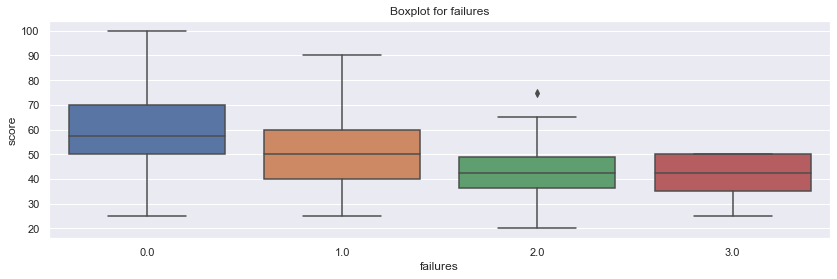

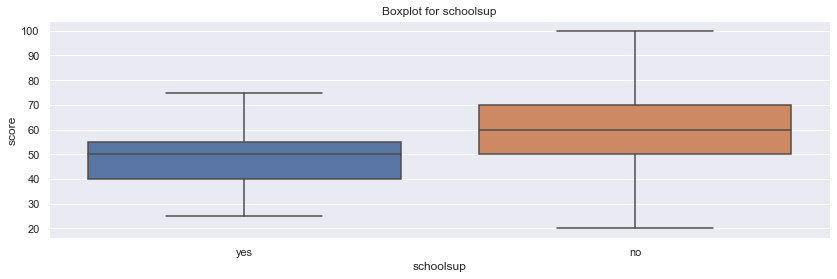

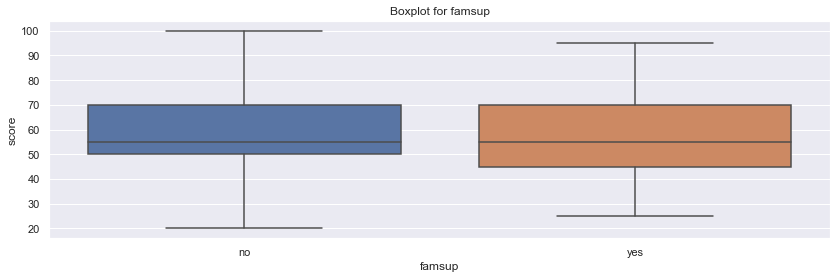

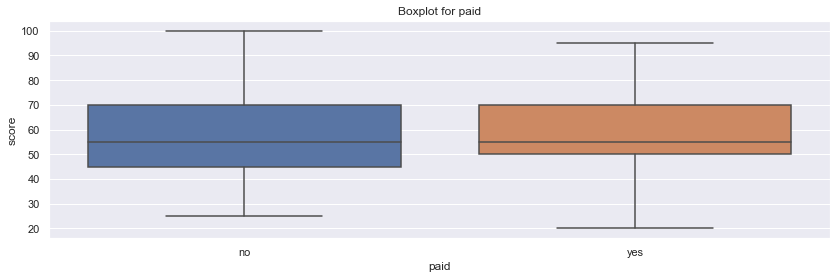

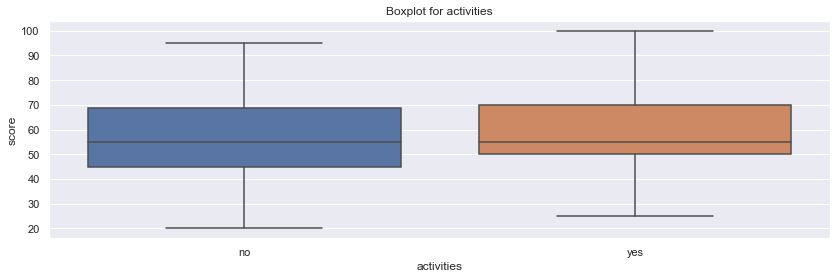

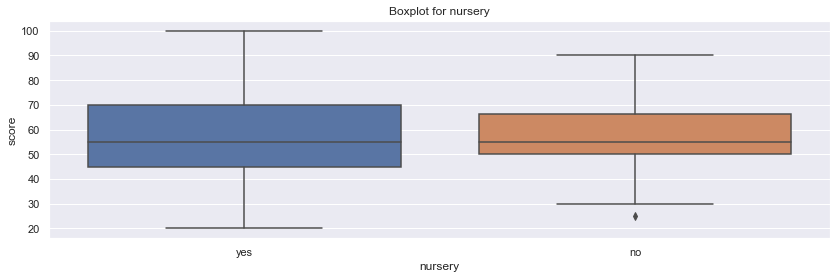

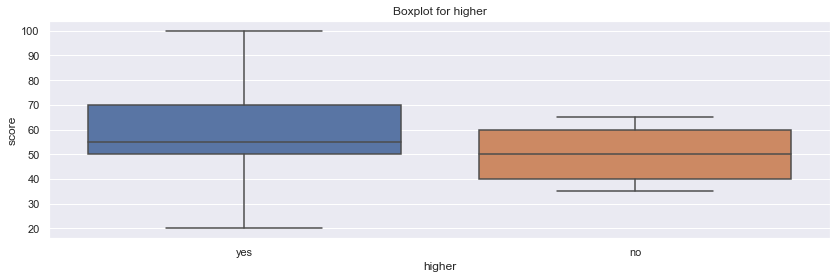

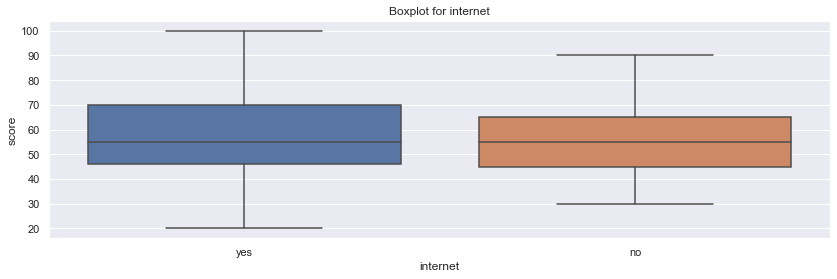

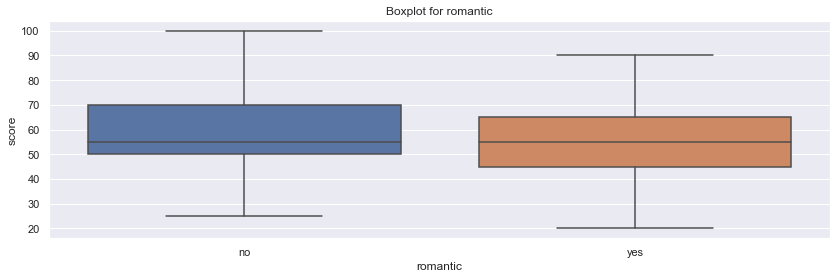

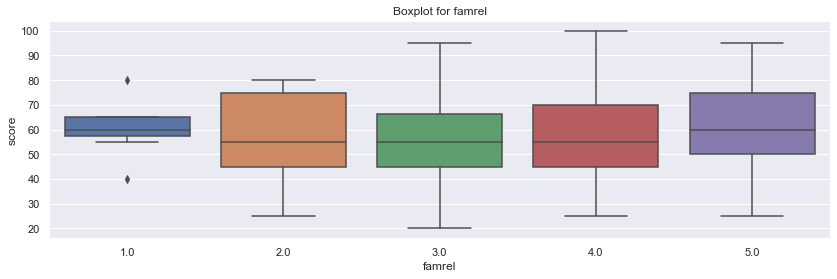

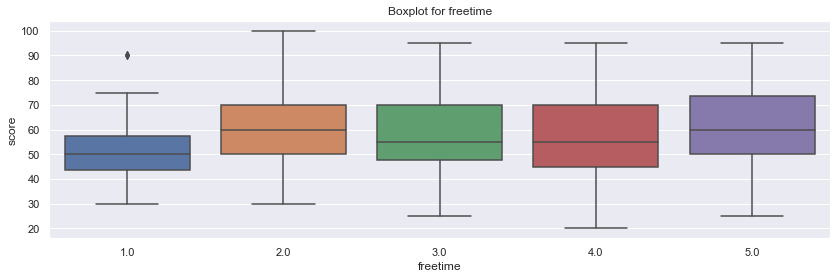

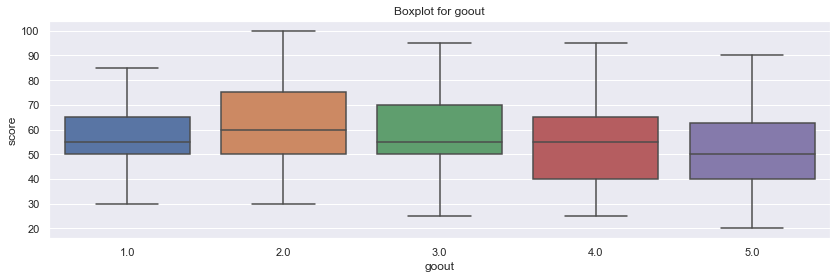

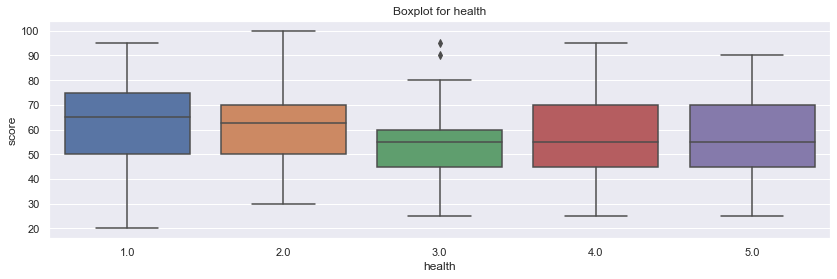

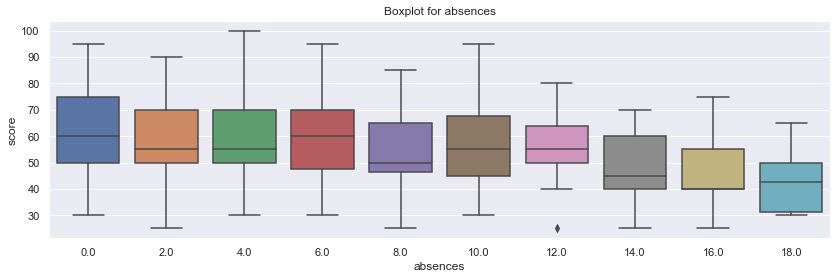

In [85]:
# Построим boxplot, чтобы наглядно представить распределение целевой переменной score для всех значений (до 10 шт.) параметров 

def get_boxplot(df_stud,column):
    fig, ax = plt.subplots(figsize = (14, 4))
    size = df_stud[column].value_counts().size
    if (size > 10):
        size = 10
    sns.boxplot(x=column, y='score', 
                data=df_stud.loc[df_stud.loc[:, column].isin(df_stud.loc[:, column].value_counts().index[:size])],
               ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in cols:
    get_boxplot(df_stud,col)


## Статистический анализ
По графикам видна зависимость от Medu и absences,однако для более точного анализа применим тест Стьюдента.

По каждому параметру выделим уникальные значения и сгенирируем все возможные пары. Для пар выделим в списки соответствующие значения score. **За нулевую гипотезу возьмем утверждение, что статистически два массива идентичны, а значит и mu_1 == mu_2**
Таким образом мы ставим задачу так, что будем искать такие пары, в которых гипотеза Не верна и Опровергается. Чтобы увеличить точность такой оценки, применим поправку Холма-Бонферони. Таким образом, если p_value <= alfa/кол-во комбинаций, значит нулевая гипотеза опреовергнута и текущий параметр влияет на целевую переменную score и его стоит исследовать.

Заметим, что поправка Холма-Бонферони здесь от обратного, так как ищем опровержение гипотезы.
Так же знаем, что выборка Score случайна и экспериментов достаточно (более 30)

In [103]:
def get_stat_dif(df_stud,column):
    size = df_stud[column].value_counts().size
    if (size > 10):
        size = 10
    cols = df_stud.loc[:, column].value_counts().index[:size]
    combinations_all = list(combinations(cols, 2))
#     print('alfa', 0.1/len(combinations_all))
    if (len(combinations_all)>1):
        i = len(combinations_all)-1
        for comb in combinations_all:
            len_1 = df_stud.loc[df_stud.loc[:, column] == comb[0], 'score'].size
            len_2 = df_stud.loc[df_stud.loc[:, column] == comb[1], 'score'].size
            if ((len_1 > 30) & (len_2 > 30)): # данных, если наблюдений более 30
                if ttest_ind(df_stud.loc[df_stud.loc[:, column] == comb[0], 'score'], \
                             df_stud.loc[df_stud.loc[:, column] == comb[1], 'score']).pvalue <= 0.1/(len(combinations_all)-i): # Учли поправку Холма-Бонферони
                    print('Найдены статистически значимые различия для колонки', column, ', comb:', comb)
                    break
            i -= 1

for col in cols:    
    get_stat_dif(df_stud,col)

Найдены статистически значимые различия для колонки Medu , comb: (4.0, 3.0)
Найдены статистически значимые различия для колонки Fedu , comb: (4.0, 1.0)
Найдены статистически значимые различия для колонки Mjob , comb: ('other', 'services')
Найдены статистически значимые различия для колонки studytime , comb: (2.0, 3.0)
Найдены статистически значимые различия для колонки failures , comb: (0.0, 1.0)
Найдены статистически значимые различия для колонки famrel , comb: (4.0, 5.0)
Найдены статистически значимые различия для колонки freetime , comb: (3.0, 2.0)
Найдены статистически значимые различия для колонки goout , comb: (2.0, 4.0)
Найдены статистически значимые различия для колонки health , comb: (3.0, 1.0)
Найдены статистически значимые различия для колонки absences , comb: (0.0, 4.0)


## Выводы по статистическому анализу

как видно, статистический анализ подтверждает и уточняет выводы, сделанные на основе коэффициентов корреляции и графиков.

In [107]:
# Оставим в итоговом датасете только те данные, которые имеют влияние на целевую переменную, и еще параметр age. 
# Будем считать, что для этого параметра недостаточно данных разных возрастов (особенно выше 20 лет)
df_model = df_stud.loc[:,['age','Medu','Fedu', 'Fjob', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']].copy()
df_model.head()

,age,Medu,Fedu,Fjob,studytime,failures,famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,teacher,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,other,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,other,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,other,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,other,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0


# Общий вывод

<ul>
    <li> В данных достаточно мало пустых значений. Однако в целевой переменной было много значений 0, которые было решено принять за выбросы.
    <li> Еще выбросы были в absences и Fedu. В общем, данные довольно чистые.
    <li> Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это 'Medu','Fedu', 'Fjob', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences'
    <li> Возраст в оценку добавлен, только как параметр, который необходимо дополнять новыми данными. В текущем наборе он не влияет на оценку.
 </ul>         
        
Заметим, что Medu, Fedu, famrel, studytime, скоррелированы положительно. Это может показывать, что
<ul>
    <li>образование родителей положительно влияет на успеваемость.
    <li>время, уделяемое учебе, положительно влияет на успеваемость.
    <li>взаимоотношения в семье положительно влияет на успеваемость, но меньше чем два других параметра.
</ul>      
  
Остальные параметры скоррелированы отрицательно, значит имеют отрицательное влияние на оценку по экзамену.
<ul>
    <li>Сильнее других отрицательно влияют на оценку - жизненные неудачи (failures) и пропуски (absences)
    <li>Далее по влиянию - время, проведенное с друзьями (goout) и время до учебы (traveltime). Это может быть из-за того, что у ученика остается меньше времени на учебу, хотя явной корреляции со studytime не выявлено.
    <li> Здоровье и свободное время влияют на оценку меньше, но все таки значительно.
</ul>      

Возможно, что все параметры по оценке времени стоит рассмотреть вместе: freetime, goout, traveltime, studytime 